# Pracownia 2 z Analizy numerycznej
### Zadanie 19
#### Autorzy:
Martyna Firgolska  
Michał Dymowski

In [6]:
using Printf

In [7]:
using Plots

Wyniki ogólnie:  
A: I_c i I_s w miarę się liczą  
B: I_c daje bardzo zły wynik, I_s liczy się jak w A  
C: I_c zbiega znacznie lepiej niż w A, I_s jak w A  
D: dziwne wyniki  

**Badane całki: definicje, przybliżone wartości, wykresy**

In [8]:
# przybliżone wartości całek I_c i I_s, źródło: Wolfram Alpha
Int_C_exact_value_wolfram = 1.809048475800544162949576733665114291615983641191003479196640074902159185352954615877833522127454977
Int_S_exact_value_wolfram = 0.6205366034467622036163048463307930151490187776648934354652171212875447590052889374947286820148085157
Int_C_exact_value = 1.809045218947
Int_S_exact_value = 0.620549071924

0.620549071924

In [9]:
# badane funkcje zmodyfikowane zgodnie z podpunktem A
# funkcje C i S przyjmują wartość 0 w x=0
function C(x)
    if( x == 0)
        return 0;
    else
        return cos(x)/sqrt(x);
    end
end

function S(x)
    if(x == 0)
        return 0;
    else
        return sin(x)/sqrt(x);
    end
end

S (generic function with 1 method)

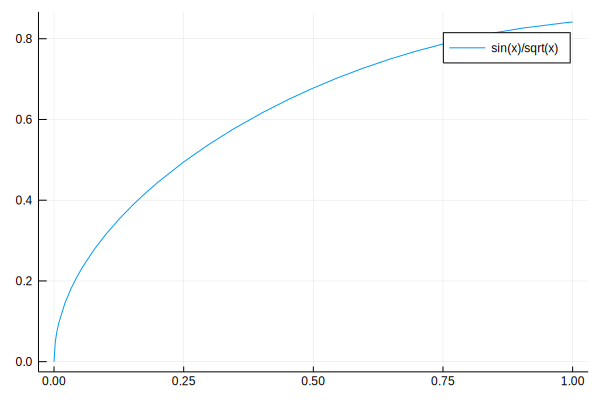

In [51]:
# Wykres funkcji S na badanym przedziale
plot(S, 0, 1, label="sin(x)/sqrt(x)")

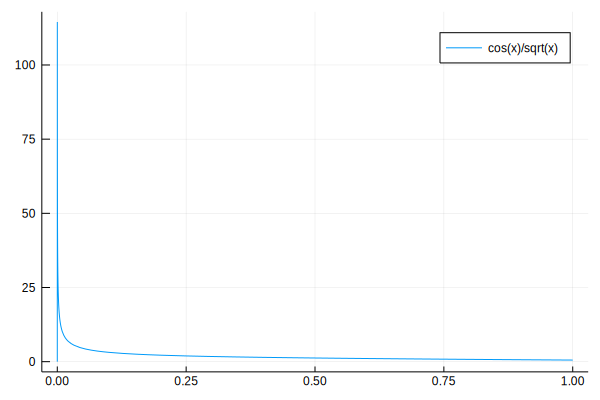

In [52]:
# Wykres funkcji C na badanym przedziale
plot(C, 0, 1, label="cos(x)/sqrt(x)")

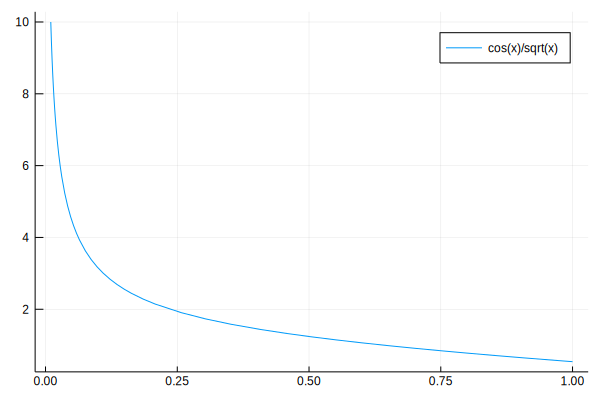

In [53]:
# Wykres funkcji C na przedziale [0.01, 1]
plot(C, 0.01, 1, label="cos(x)/sqrt(x)")

### Metoda trapezów: 

In [16]:
# Całkowanie funkcji f na przedziale [left,right] 
# metodą trapezów z points równoodległymi punktami
function int_trapez(f, left, right, points)
    width = (right-left)/(points-1);
    sum = (f(left)+f(right))*0.5;
    
    for i in 1:(points-1)
        sum += f(left + i*width);
    end
    
    sum *= width;
    return sum;
end

int_trapez (generic function with 1 method)

In [17]:
# Całkowanie funkcji f na przedziale [left,right] 
# metodą trapezów z points równoodległymi punktami
# zaczynajac od prawej strony
function int_trapez_right_to_left(f, left, right, points)
    width = (right-left)/(points-1);
    sum = (f(left)+f(right))*0.5;
    
    for i in (points-1):1
        sum += f(left + i*width);
    end
    
    sum *= width;
    return sum;
end

int_trapez_right_to_left (generic function with 1 method)

### Podpunkt A

In [18]:
## badany zakres ilości punktów metody trapezów
Arange = 100:100:1000

100:100:1000

In [19]:
# wyniki metody trapezów dla I_c
AresultsIC = [int_trapez(C,0.0,1.0,p) for p in Arange]

10-element Array{Float64,1}:
 1.6677256034277628
 1.7082394599682968
 1.726399997150005 
 1.7372928699596446
 1.7447564299910763
 1.750281758632448 
 1.7545855714753669
 1.7580609258924103
 1.7609438155984576
 1.7633856545771385

In [20]:
# wyniki metody trapezów dla I_s
AresultsIS = [int_trapez(S,0.0,1.0,p) for p in Arange]

10-element Array{Float64,1}:
 0.6288262828757042
 0.6246912988653139
 0.6233107905275299
 0.6226195323389588
 0.6222043082298286
 0.6219272438774593
 0.6217291960934527
 0.6215805696160139
 0.6214649112045778
 0.6213723429157811

In [21]:
# moduł błędu bezwzględnego
AerrorIC = abs.([x-Int_C_exact_value for x in AresultsIC])

10-element Array{Float64,1}:
 0.14131961551923733 
 0.10080575897870325 
 0.08264522179699507 
 0.0717523489873555  
 0.06428878895592383 
 0.05876346031455215 
 0.05445964747163323 
 0.050984293054589847
 0.048101403348542515
 0.04565956436986163 

In [22]:
# moduł błędu bezwzględnego
AerrorIS = abs.([x-Int_S_exact_value for x in AresultsIS])

10-element Array{Float64,1}:
 0.008277210951704195 
 0.004142226941313942 
 0.002761718603529917 
 0.0020704604149588413
 0.0016552363058286446
 0.0013781719534593506
 0.0011801241694526787
 0.0010314976920139385
 0.0009158392805778126
 0.0008232709917811443

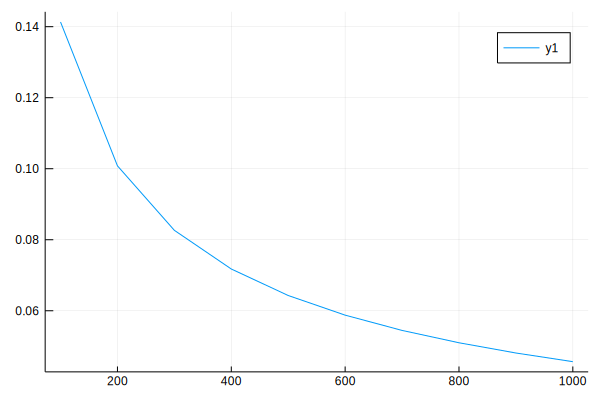

In [23]:
# wykres błędu bezwzględnego w zależności od ilości punktów metody trapezów dla I_c
plot(Arange, AerrorIC)

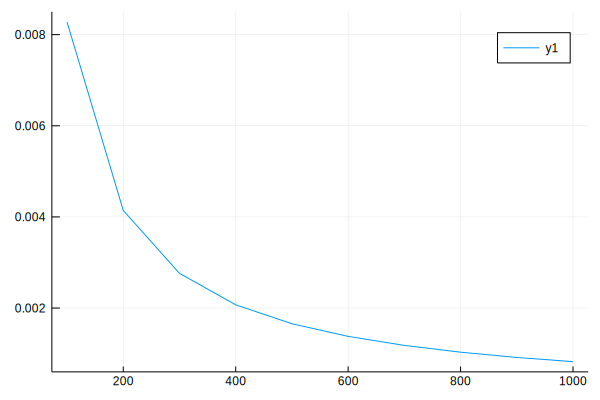

In [24]:
# wykres błędu bezwzględnego w zależności od ilości punktów metody trapezów dla I_s
plot(Arange, AerrorIS)

In [25]:
# błędy względne
Arel_errorIS = [abs(x/Int_S_exact_value) for x in AerrorIS]
Arel_errorIC = [abs(x/Int_C_exact_value) for x in AerrorIC]

10-element Array{Float64,1}:
 0.07811834333333909 
 0.0557231836567246  
 0.045684442230305766
 0.03966310418106671 
 0.0355374140361979  
 0.03248313513620013 
 0.030104083027472816
 0.028182984328200777
 0.026589386956585383
 0.02523959262689902 

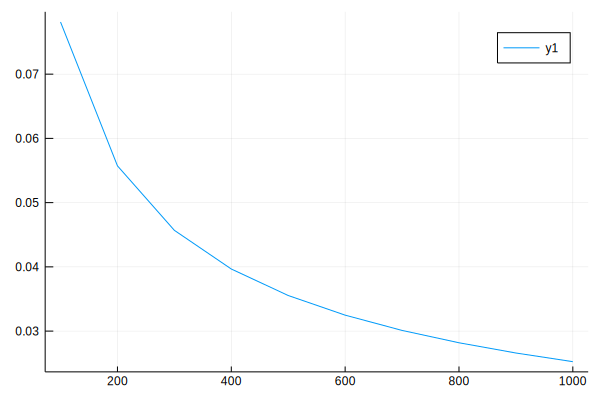

In [26]:
# wykres błędu względnego w zależności od ilości punktów metody trapezów dla I_c
plot(Arange, Arel_errorIC)

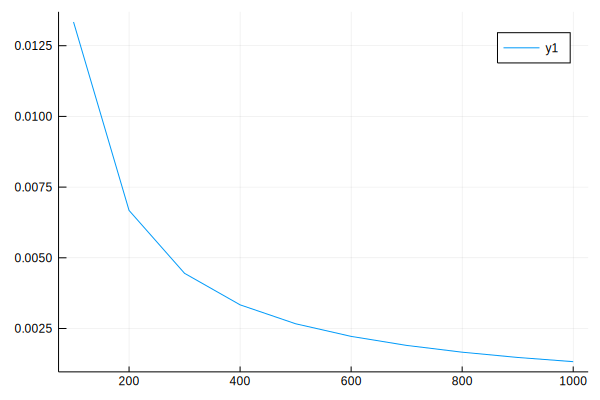

In [27]:
# wykres błędu względnego w zależności od ilości punktów metody trapezów dla I_s
plot(Arange, Arel_errorIS)

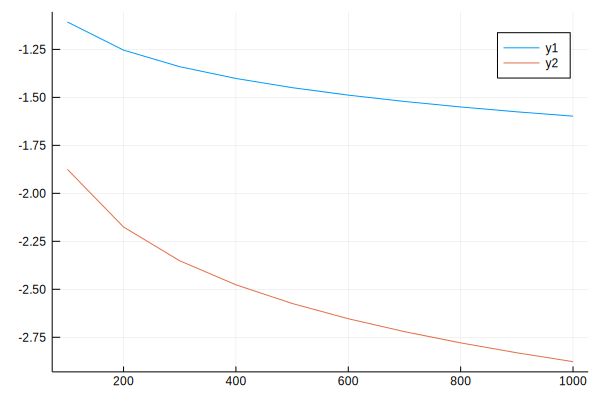

In [28]:
# wykres logarytmu z błędu względnego - porównanie działania metody trapezów dla I_s i I_c
plot(Arange, [log10(x) for x in Arel_errorIC])
plot!(Arange, [log10(x) for x in Arel_errorIS])

Wnioski:  
Metoda poprawnie liczy obie całki, ale lepiej radzi sobie z S  
Prawdopodobnie wynika to z faktu, że funkcja S jest ograniczona 
na badanym przedziale i jej granica w zerze wynosi 0
a funkcja C jest nieograniczona w okolicy 0

### Podpunkt B

In [29]:
## Ale jak użyjemy poprawnie wyprowadzonego wzorku to wyniki już są poprawne ##
# wzorek: int_trapez(C,h,1.0,p)+(2.0/3.0)*sqrt(h)*(2*cos(0*h)+cos(h))
Brange = Arange
h = 2e-10
BresultsIC = [(int_trapez(C,h,1.0,p)+(2.0/3.0)*sqrt(h)*(2*cos(0)+cos(h))) for p in Brange]

10-element Array{Float64,1}:
 358.79239077659105 
 179.3732881036611  
 119.97170938813724 
  90.34719346043909 
  72.5971675786862  
  60.77424835413889 
  52.334498043775646
  46.00757487519528 
  41.088379269190014
  37.15414371263429 

In [30]:
BresultsIS = [(int_trapez(S,h,1.0,p)+(2.0/3.0)*sqrt(h)*(2*sin(0)+sin(h))) for p in Brange]

10-element Array{Float64,1}:
 0.6288263542843195
 0.6246913343871437
 0.6233108141675909
 0.6226195500532103
 0.6222043223934388
 0.6219272556760056
 0.6217292062036702
 0.6215805784605386
 0.6214649190650054
 0.6213723499891415

In [31]:
# nie wiem dlaczego dla S niepoprawny wzorek działa lepiej
# ale zobaczmy jak to będzie wyglądać jeśli za h przyjmiemy 1/p
BresultsICv2 = [(int_trapez(C,1.0/p,1.0,p)+(2.0/3.0)*sqrt(1.0/p)*(2*cos(0)+cos(1.0/p))) for p in Brange]
BresultsISv2 = [(int_trapez(S,1.0/p,1.0,p)+(2.0/3.0)*sqrt(1.0/p)*(2*sin(0)+sin(1.0/p))) for p in Brange]

10-element Array{Float64,1}:
 0.6289110872019322
 0.6247296338953485
 0.6233336846692772
 0.622635190715545 
 0.6222158984721524
 0.6219362781243871
 0.6217364995379555
 0.6215866360800248
 0.6214700568571285
 0.6213767809176636

In [32]:
BerrorICv2 = abs.([x-Int_C_exact_value for x in BresultsICv2])
BerrorISv2 = abs.([x-Int_S_exact_value for x in BresultsISv2])
BerrorIC = abs.([x-Int_C_exact_value for x in BresultsIC])
BerrorIS = abs.([x-Int_S_exact_value for x in BresultsIS])

10-element Array{Float64,1}:
 0.008277282360319549 
 0.004142262463143753 
 0.0027617422435909367
 0.0020704781292103513
 0.0016552504694388182
 0.0013781837520056017
 0.0011801342796702308
 0.0010315065365386067
 0.0009158471410054547
 0.0008232780651414862

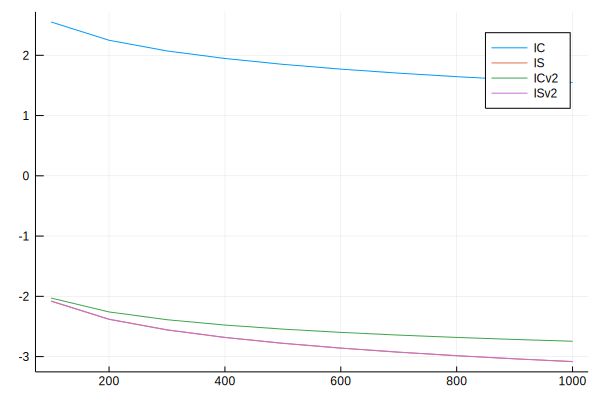

In [33]:
plot(Brange, [log10(x) for x in BerrorIC], label="IC")
plot!(Brange, [log10(x) for x in BerrorIS], label="IS")
plot!(Brange, [log10(x) for x in BerrorICv2], label="ICv2")
plot!(Brange, [log10(x) for x in BerrorISv2], label="ISv2")

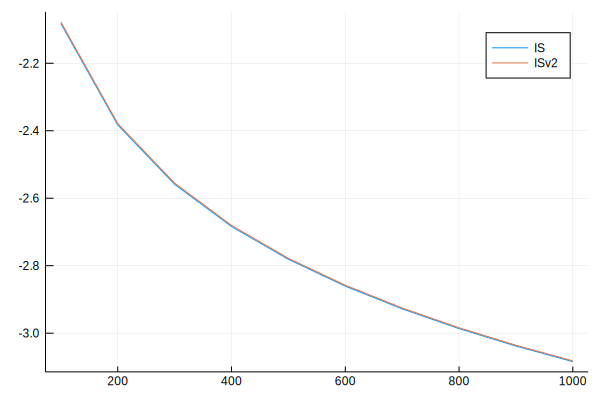

In [34]:
#wykresy Is i Isv2 się pokrywają
plot(Brange, [log10(x) for x in BerrorIS], label="IS")
plot!(Brange, [log10(x) for x in BerrorISv2], label="ISv2")

In [35]:
Brel_errorICv2 = [x/Int_C_exact_value for x in BerrorICv2]
Brel_errorISv2 = [x/Int_S_exact_value for x in BerrorISv2]
Brel_errorIC = [x/Int_C_exact_value for x in BerrorIC]
Brel_errorIS = [x/Int_S_exact_value for x in BerrorIS]

10-element Array{Float64,1}:
 0.013338642719512898 
 0.006675156970746489 
 0.004450481627549954 
 0.003336526026524986 
 0.0026673965755951374
 0.0022209101815793076
 0.0019017581897451687
 0.0016622481334803085
 0.0014758657815181141
 0.0013266929279080685

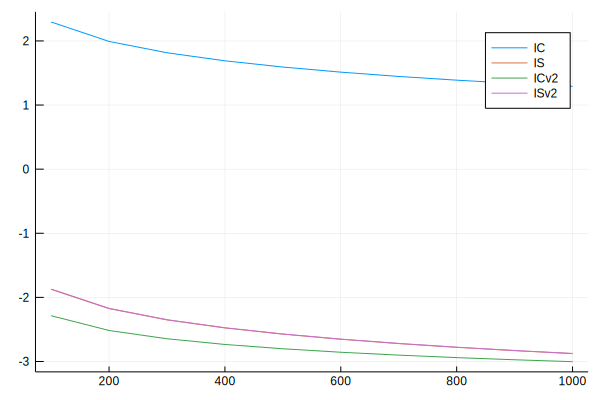

In [36]:
plot(Brange, [log10(x) for x in Brel_errorIC], label="IC")
plot!(Brange, [log10(x) for x in Brel_errorIS], label="IS")
plot!(Brange, [log10(x) for x in Brel_errorICv2], label="ICv2")
plot!(Brange, [log10(x) for x in Brel_errorISv2], label="ISv2")

Wnioski:  
Znowu, tak jak się spodziewaliśmy całka I_s liczy się lepiej  
W I_c widzimy poprawę, gdy zmieniamy wartość h  
I_s daje te same wyniki niezależnie od h

### Podpunkt C

In [37]:
#Podpunkt C, 
#funkcja C zmienia się w 2*cos(t^2), a S w 2*sin(t^2)
Cnew(x) = 2*cos(x^2);
Snew(x) = 2*sin(x^2);


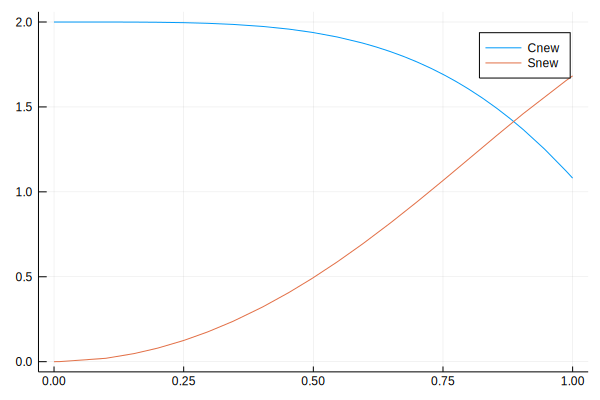

In [50]:
plot(Cnew, 0, 1, label="Cnew")
plot!(Snew, 0, 1, label="Snew")

In [43]:
Crange = 20:20:200
CresultsIC = [int_trapez(Cnew,0.0,1.0,p) for p in Crange]
CresultsIS = [int_trapez(Snew,0.0,1.0,p) for p in Crange]
CresultsIC_rangeA = [int_trapez(Cnew,0.0,1.0,p) for p in Arange]
CresultsIS_rangeA = [int_trapez(Snew,0.0,1.0,p) for p in Arange]

10-element Array{Float64,1}:
 0.6375543934526344
 0.6289981461788563
 0.6261671864394782
 0.624755634400694 
 0.6239099559383896
 0.623346691324667 
 0.622944614354665 
 0.6226431959091088
 0.6224088418274413
 0.6222214105045255

In [44]:
CerrorIC = abs.([x-Int_C_exact_value for x in CresultsIC])
CerrorIS = abs.([x-Int_S_exact_value for x in CresultsIS])
Crel_errorIC = [x/Int_C_exact_value for x in CerrorIC]
Crel_errorIS = [x/Int_S_exact_value for x in CerrorIS]
CerrorIC_rangeA = abs.([x-Int_C_exact_value for x in CresultsIC_rangeA])
CerrorIS_rangeA = abs.([x-Int_S_exact_value for x in CresultsIS_rangeA])
Crel_errorIC_rangeA = [x/Int_C_exact_value for x in CerrorIC_rangeA]
Crel_errorIS_rangeA = [x/Int_S_exact_value for x in CerrorIS_rangeA]

10-element Array{Float64,1}:
 0.02740366926326998  
 0.013615481252208012 
 0.009053457284303675 
 0.006778774905990399 
 0.0054159842733617425
 0.004508296808813307 
 0.0038603593801818845
 0.0033746307582347775
 0.00299697475604161  
 0.0026949336582527787

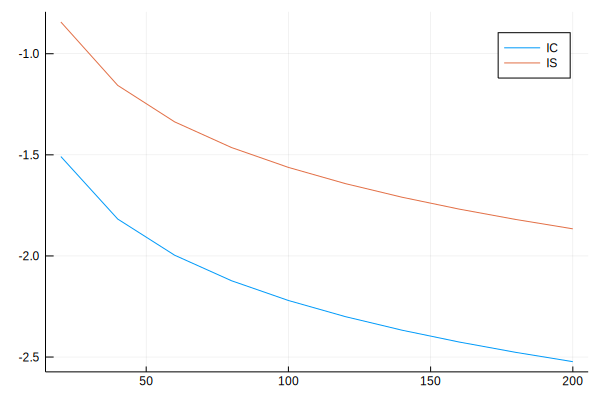

In [45]:
plot(Crange, [log10(x) for x in Crel_errorIC], label="IC")
plot!(Crange, [log10(x) for x in Crel_errorIS], label="IS")

Obserwacje:  
Ta metoda działa lepiej dla I_c niż dla I_s  
Czemu? Może dlatego, że sin(t^2) na przedziale [0,1] przyjmuje wartości bliskie 0, a cosinus nie? No nie wiem?  
W każdym razie funkcja cos(t^2) już nie ma problemu w 0 (tak jak to było dla oryginalnej funkcji C) i pewnie dlatego ta metoda działa lepiej niż reszta

### Podpunkt D

In [36]:
#Podpunkt D, wielomian st. 2.
x_1 = (sqrt(3)+1)/(2*sqrt(3));
x_2 = 1/(sqrt(3)*(sqrt(3)+1));
max_iter = 20;

@printf("funkcja C: iteracja,wartość\n");
for i in 0:max_iter
    @printf("%d,%.16f\n",i,C(x_1)+C(x_2));
end

funkcja C: iteracja,wartość
0,2.9205468739315013
1,2.9205468739315013
2,2.9205468739315013
3,2.9205468739315013
4,2.9205468739315013
5,2.9205468739315013
6,2.9205468739315013
7,2.9205468739315013
8,2.9205468739315013
9,2.9205468739315013
10,2.9205468739315013
11,2.9205468739315013
12,2.9205468739315013
13,2.9205468739315013
14,2.9205468739315013
15,2.9205468739315013
16,2.9205468739315013
17,2.9205468739315013
18,2.9205468739315013
19,2.9205468739315013
20,2.9205468739315013


In [37]:
#Podpunkt D, wielomian st. 2.
x_1 = (sqrt(3)+1)/(2*sqrt(3));
x_2 = 1/(sqrt(3)*(sqrt(3)+1));
max_iter = 20;

@printf("funkcja S: iteracja,wartość\n");
for i in 0:max_iter
    @printf("%d,%.16f\n",i,S(x_1)+S(x_2));
end

funkcja S: iteracja,wartość
0,1.2551170510195926
1,1.2551170510195926
2,1.2551170510195926
3,1.2551170510195926
4,1.2551170510195926
5,1.2551170510195926
6,1.2551170510195926
7,1.2551170510195926
8,1.2551170510195926
9,1.2551170510195926
10,1.2551170510195926
11,1.2551170510195926
12,1.2551170510195926
13,1.2551170510195926
14,1.2551170510195926
15,1.2551170510195926
16,1.2551170510195926
17,1.2551170510195926
18,1.2551170510195926
19,1.2551170510195926
20,1.2551170510195926


In [ ]:
#Podpunkt D, wielomian stopnia 3.

In [ ]:
#Podpunkt D, wielomian stopnia 3.

In [ ]:
#Podpunkt D, wielomian stopnia 4.

In [ ]:
#Podpunkt D, wielomian stopnia 4.

In [31]:
#Podpunkt D, wielomian stopnia 5.
x_4 = ((1/3.0)*sqrt(5+2*sqrt(10/7.0)+1))*0.5;
x_3 = ((1/3.0)*sqrt(5-2*sqrt(10/7.0)+1))*0.5;
x_2 = 0.5;
x_0 = (1-(1/3.0)*sqrt(5+2*sqrt(10/7.0)))*0.5;
x_1 = (1-(1/3.0)*sqrt(5-2*sqrt(10/7.0)+1))*0.5;

A_4 = (161 - 65*sqrt(0.7))/450;
A_3 = (161 + 65*sqrt(0.7))/450;
A_2 = 128/225.0;
A_0 = A_4;
sA_1 = A_3;

max_iter = 20;

@printf("funkcja C: iteracja,wartość\n");
for i in 0:max_iter
    @printf("%d,%.16f\n",i,A_0*C(x_0)+A_1*C(x_1)+A_2*C(x_2)+A_3*C(x_3)+A_4*C(x_4));
end

funkcja C: iteracja,wartość
0,4.0080922220158843
1,4.0080922220158843
2,4.0080922220158843
3,4.0080922220158843
4,4.0080922220158843
5,4.0080922220158843
6,4.0080922220158843
7,4.0080922220158843
8,4.0080922220158843
9,4.0080922220158843
10,4.0080922220158843
11,4.0080922220158843
12,4.0080922220158843
13,4.0080922220158843
14,4.0080922220158843
15,4.0080922220158843
16,4.0080922220158843
17,4.0080922220158843
18,4.0080922220158843
19,4.0080922220158843
20,4.0080922220158843


In [33]:
#Podpunkt D, wielomian stopnia 5.
@printf("funkcja S: iteracja,wartość\n");
for i in 0:max_iter
    @printf("%d,%.16f\n",i,A_0*S(x_0)+A_1*S(x_1)+A_2*S(x_2)+A_3*S(x_3)+A_4*S(x_4));
end

funkcja S: iteracja,wartość
0,1.0639633547755623
1,1.0639633547755623
2,1.0639633547755623
3,1.0639633547755623
4,1.0639633547755623
5,1.0639633547755623
6,1.0639633547755623
7,1.0639633547755623
8,1.0639633547755623
9,1.0639633547755623
10,1.0639633547755623
11,1.0639633547755623
12,1.0639633547755623
13,1.0639633547755623
14,1.0639633547755623
15,1.0639633547755623
16,1.0639633547755623
17,1.0639633547755623
18,1.0639633547755623
19,1.0639633547755623
20,1.0639633547755623


No coś tu jest bardzo nie halo bo:  
We wszystkich wynikach wypisujesz tę samą wartość ileśtam razy. Po co?  
A poza tym to tą kwadraturę mieliśmy użyć dla całek z punktu c, więc dlaczego używasz funkcji S i C, a nie Snew i Cnew?

Podsumowanie wszystkich metod:

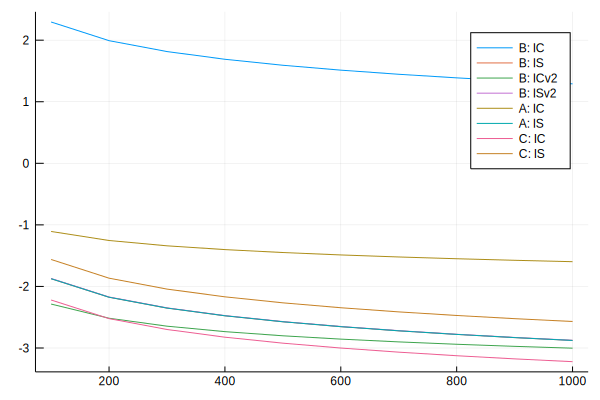

In [48]:
plot(Brange, [log10(x) for x in Brel_errorIC], label="B: IC")
plot!(Brange, [log10(x) for x in Brel_errorIS], label="B: IS")
plot!(Brange, [log10(x) for x in Brel_errorICv2], label="B: ICv2")
plot!(Brange, [log10(x) for x in Brel_errorISv2], label="B: ISv2")
plot!(Arange, [log10(x) for x in Arel_errorIC], label="A: IC")
plot!(Arange, [log10(x) for x in Arel_errorIS], label="A: IS")
plot!(Arange, [log10(x) for x in Crel_errorIC_rangeA], label="C: IC")
plot!(Arange, [log10(x) for x in Crel_errorIS_rangeA], label="C: IS")